In [339]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import math
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from tensorflow import keras
import seaborn as sns
color_pal = sns.color_palette()
from sklearn.metrics import mean_squared_error
import xgboost as xgb
plt.style.use('fivethirtyeight')

In [340]:
df=pd.read_excel("apple.xlsx")
df=df.dropna()
df

,Symbol,Sample Time,Open,High,Low,Close,Volume
0,AAPL,2000-01-03 14:30:00,0.936384,1.004464,0.907924,0.999442,535796800
1,AAPL,2000-01-04 14:30:00,0.966518,0.987723,0.903460,0.915179,512377600
2,AAPL,2000-01-05 14:30:00,0.926339,0.987165,0.919643,0.928571,778321600
3,AAPL,2000-01-06 14:30:00,0.947545,0.955357,0.848214,0.848214,767972800
4,AAPL,2000-01-07 14:30:00,0.861607,0.901786,0.852679,0.888393,460734400
...,...,...,...,...,...,...,...
5279,AAPL,2020-12-24 14:30:00,131.320007,133.460007,131.100006,131.970001,54930100
5280,AAPL,2020-12-28 14:30:00,133.990005,137.339996,133.509995,136.690002,124486200
5281,AAPL,2020-12-29 14:30:00,138.050003,138.789993,134.339996,134.869995,121047300
5282,AAPL,2020-12-30 14:30:00,135.580002,135.990005,133.399994,133.720001,96452100


In [341]:
df=df.drop(['Symbol'], axis=1)
df

df.rename(columns = {'Sample Time':'datetime'}, inplace = True)
# data = (data-data.min())/(data.max()-data.min())
# data

In [342]:
df

,datetime,Open,High,Low,Close,Volume
0,2000-01-03 14:30:00,0.936384,1.004464,0.907924,0.999442,535796800
1,2000-01-04 14:30:00,0.966518,0.987723,0.903460,0.915179,512377600
2,2000-01-05 14:30:00,0.926339,0.987165,0.919643,0.928571,778321600
3,2000-01-06 14:30:00,0.947545,0.955357,0.848214,0.848214,767972800
4,2000-01-07 14:30:00,0.861607,0.901786,0.852679,0.888393,460734400
...,...,...,...,...,...,...
5279,2020-12-24 14:30:00,131.320007,133.460007,131.100006,131.970001,54930100
5280,2020-12-28 14:30:00,133.990005,137.339996,133.509995,136.690002,124486200
5281,2020-12-29 14:30:00,138.050003,138.789993,134.339996,134.869995,121047300
5282,2020-12-30 14:30:00,135.580002,135.990005,133.399994,133.720001,96452100


In [343]:
# data=df.drop(['datetime'], axis=1)
# data = (data-data.min())/(data.max()-data.min())
# df = pd.concat((data, df.datetime), 1)

In [344]:
df=df.set_index('datetime')
df

,Open,High,Low,Close,Volume
datetime,,,,,
2000-01-03 14:30:00,0.936384,1.004464,0.907924,0.999442,535796800
2000-01-04 14:30:00,0.966518,0.987723,0.903460,0.915179,512377600
2000-01-05 14:30:00,0.926339,0.987165,0.919643,0.928571,778321600
2000-01-06 14:30:00,0.947545,0.955357,0.848214,0.848214,767972800
2000-01-07 14:30:00,0.861607,0.901786,0.852679,0.888393,460734400
...,...,...,...,...,...
2020-12-24 14:30:00,131.320007,133.460007,131.100006,131.970001,54930100
2020-12-28 14:30:00,133.990005,137.339996,133.509995,136.690002,124486200
2020-12-29 14:30:00,138.050003,138.789993,134.339996,134.869995,121047300


In [345]:
data=df
df=df.drop(['Open','Close','Volume','Low'], axis=1)
df

,High
datetime,
2000-01-03 14:30:00,1.004464
2000-01-04 14:30:00,0.987723
2000-01-05 14:30:00,0.987165
2000-01-06 14:30:00,0.955357
2000-01-07 14:30:00,0.901786
...,...
2020-12-24 14:30:00,133.460007
2020-12-28 14:30:00,137.339996
2020-12-29 14:30:00,138.789993


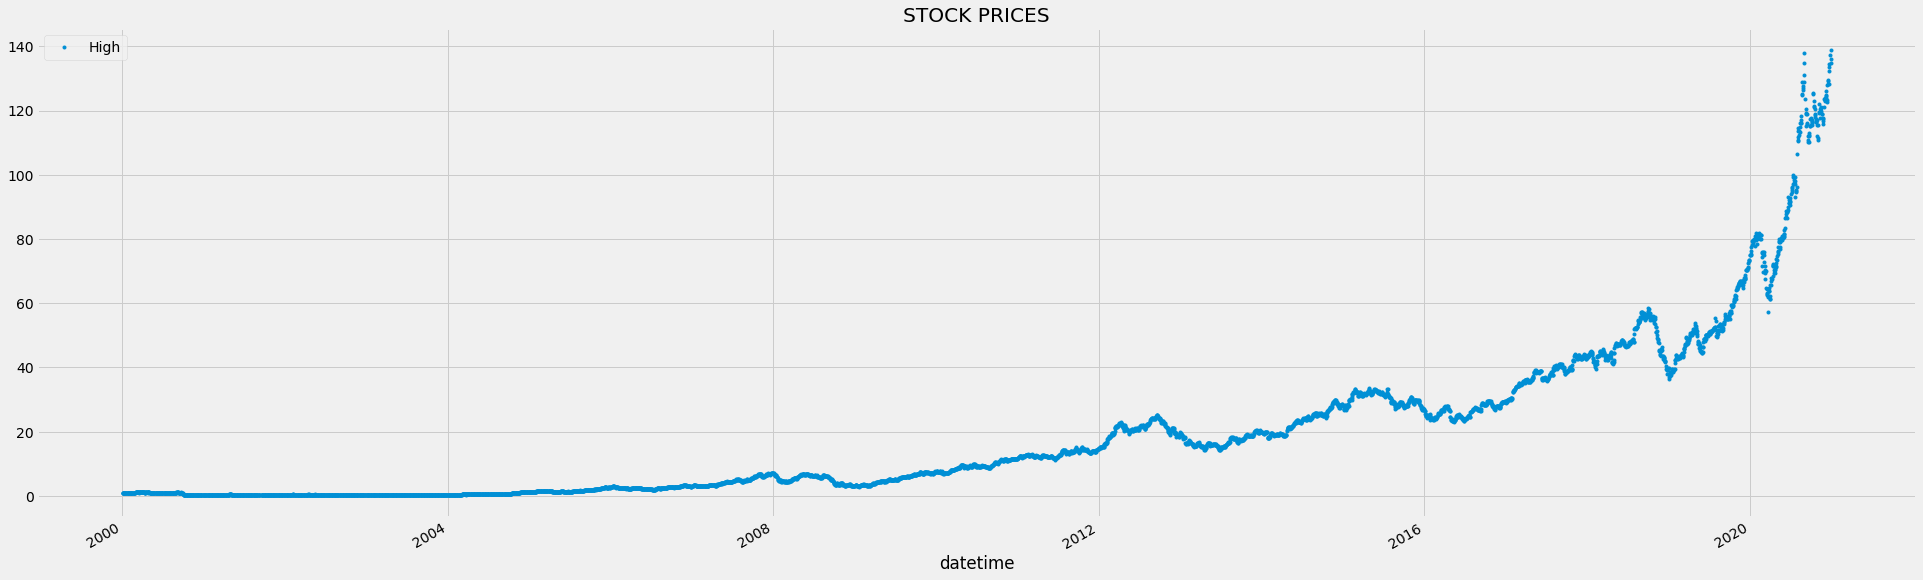

In [346]:
df.plot(style='.',
        figsize=(30, 10),
        color=color_pal[0],
        title='STOCK PRICES')
plt.show()


<AxesSubplot:ylabel='Frequency'>

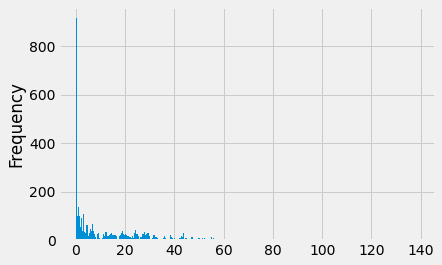

In [347]:
df['High'].plot(kind='hist', bins=500)

<AxesSubplot:title={'center':'Outliers'}, xlabel='datetime'>

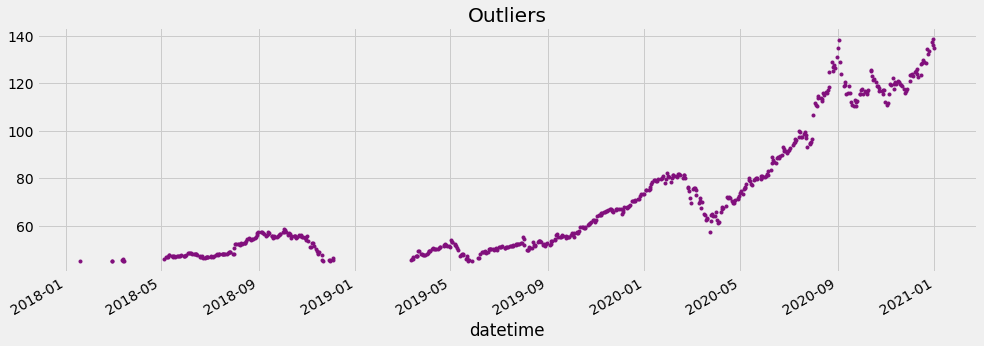

In [348]:
df.query('High > 45')['High'] \
    .plot(style='.',
          figsize=(15, 5),
          color=color_pal[5],
          title='Outliers')

In [349]:
train=df.loc[df.index<'2018-01-01']
test=df.loc[df.index>='2018-01-01']

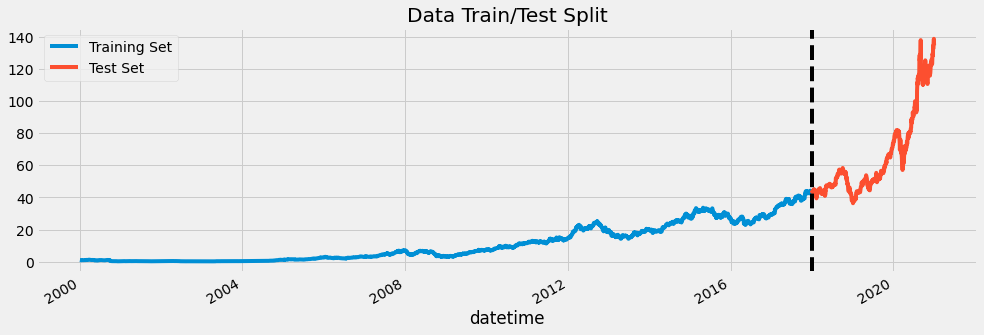

In [350]:
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2018', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [351]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=5, test_size=365, gap=24)
df = df.sort_index()

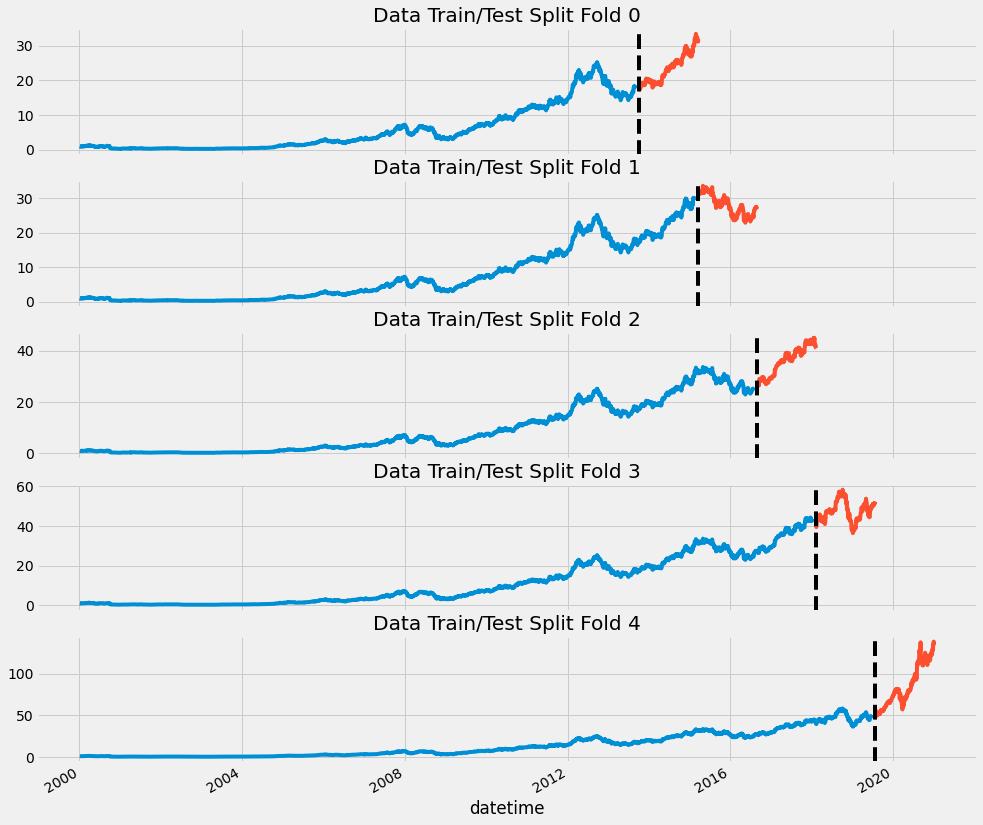

In [352]:
fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    train['High'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['High'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

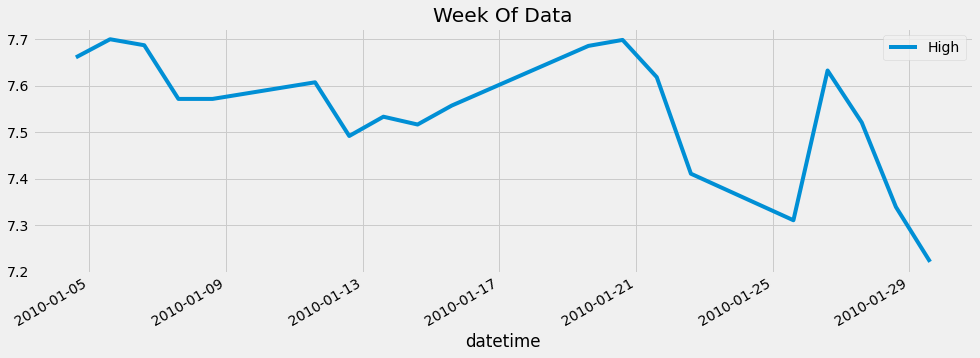

In [353]:
df.loc[(df.index > '2010-01-01') & (df.index < '2010-01-31')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

In [354]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

In [355]:
def add_lags(df):
    target_map = df['High'].to_dict()
    df['lag1'] = (df.index - pd.Timedelta('364 days')).map(target_map)
    df['lag2'] = (df.index - pd.Timedelta('728 days')).map(target_map)
    df['lag3'] = (df.index - pd.Timedelta('1092 days')).map(target_map)
    return df

In [356]:
df=create_features(df)
df = add_lags(df)

In [357]:
df.tail()

,High,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3
datetime,,,,,,,,,,,,
2020-12-24 14:30:00,133.460007,14,3,4,12,2020,359,24,52,72.495003,39.192501,42.962502
2020-12-28 14:30:00,137.339996,14,0,4,12,2020,363,28,53,73.172501,39.840000,NaN
2020-12-29 14:30:00,138.789993,14,1,4,12,2020,364,29,53,73.419998,NaN,43.075001
2020-12-30 14:30:00,135.990005,14,2,4,12,2020,365,30,53,NaN,39.712502,43.637501
2020-12-31 14:30:00,134.740005,14,3,4,12,2020,366,31,53,75.150002,36.430000,43.367500


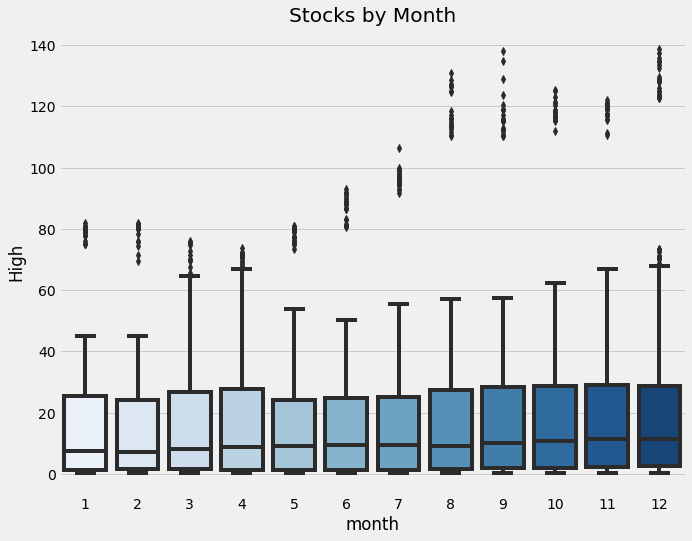

In [358]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='High', palette='Blues')
ax.set_title('Stocks by Month')
plt.show()

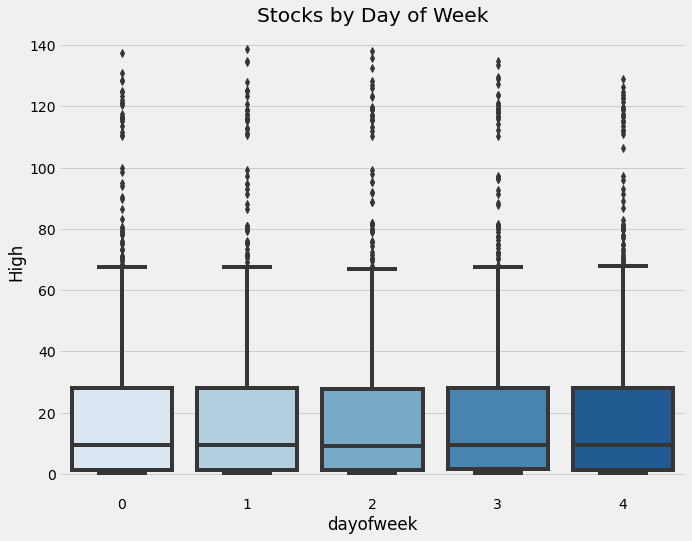

In [359]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='dayofweek', y='High', palette='Blues')
ax.set_title('Stocks by Day of Week')
plt.show()

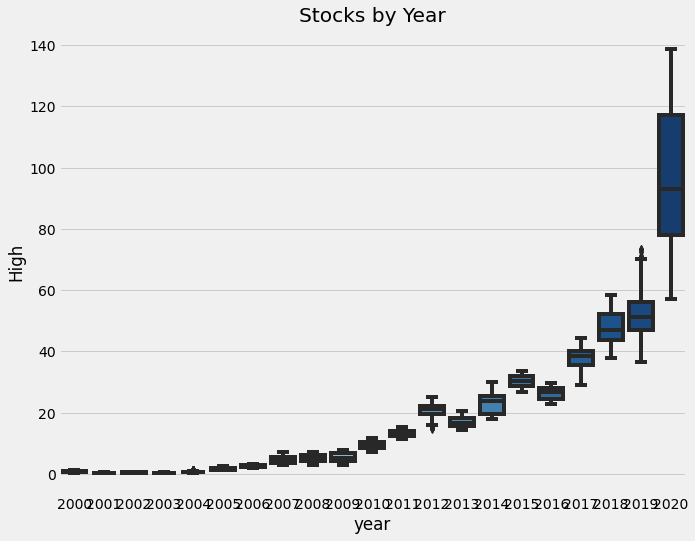

In [360]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='year', y='High', palette='Blues')
ax.set_title('Stocks by Year')
plt.show()

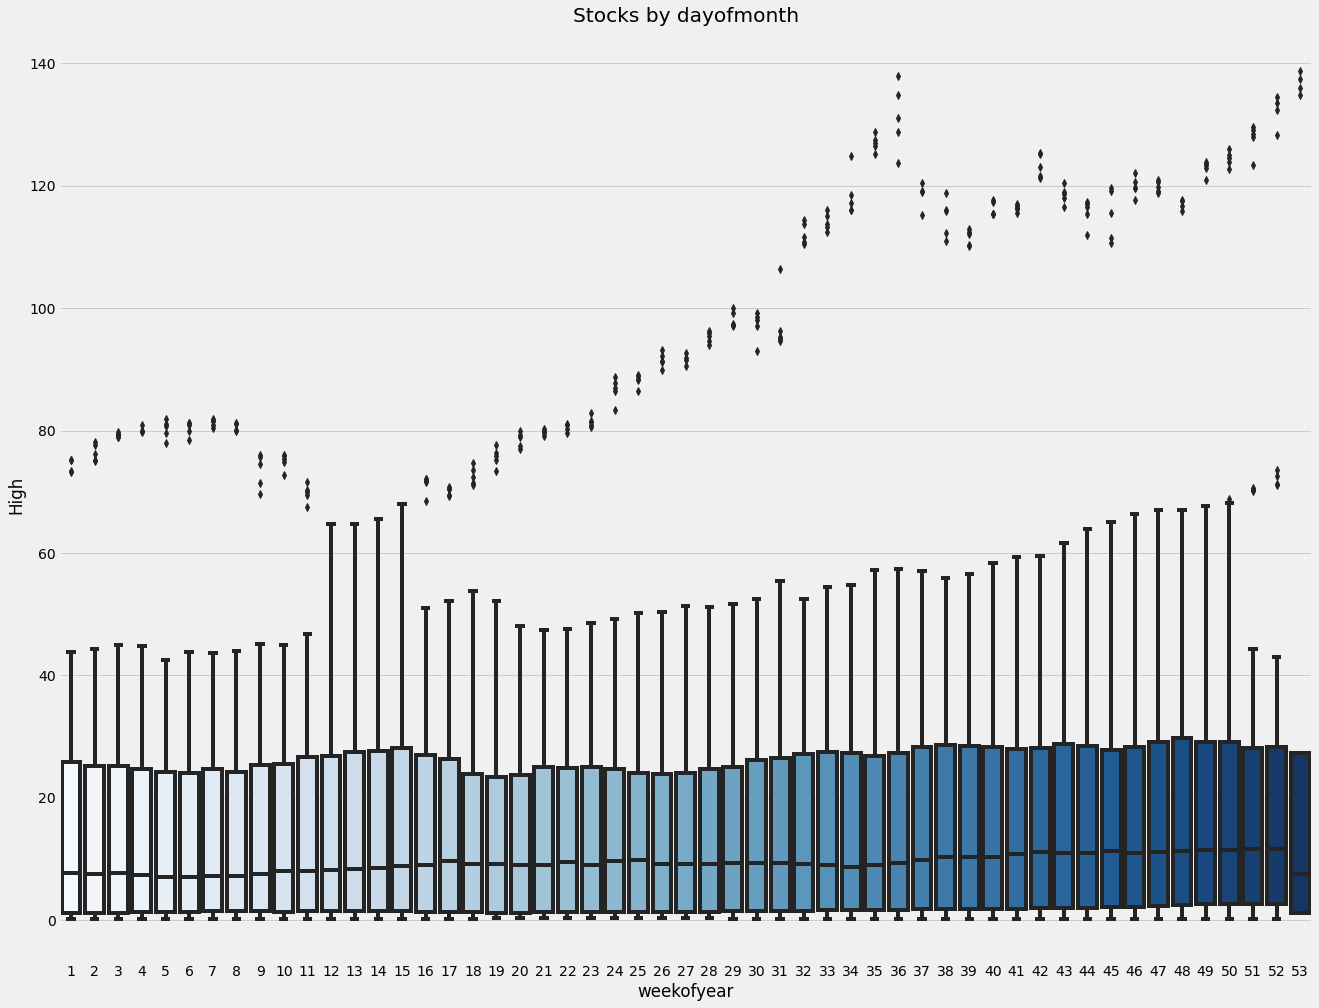

In [361]:
fig, ax = plt.subplots(figsize=(20, 16))
sns.boxplot(data=df, x='weekofyear', y='High', palette='Blues')
ax.set_title('Stocks by dayofmonth')
plt.show()

In [362]:
tss = TimeSeriesSplit(n_splits=5, test_size=365, gap=24)
df = df.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]

    train = create_features(train)
    test = create_features(test)

    FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month','year',
                'lag1','lag2','lag3']
    TARGET = 'High'

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

[10:09:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:8.01199	validation_1-rmse:23.26542
[100]	validation_0-rmse:3.05724	validation_1-rmse:13.54237
[200]	validation_0-rmse:1.29563	validation_1-rmse:9.93484
[300]	validation_0-rmse:0.71673	validation_1-rmse:8.76160
[400]	validation_0-rmse:0.53747	validation_1-rmse:8.37560
[500]	validation_0-rmse:0.46119	validation_1-rmse:8.29340
[600]	validation_0-rmse:0.42187	validation_1-rmse:8.30227
[619]	validation_0-rmse:0.41659	validation_1-rmse:8.31518
[10:09:02] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:10.25890	validation_1-rmse:27.47454
[100]	validation_0-rmse:3.96693	validation_1-rmse:11.76885
[200]	validation_0-rmse:1.77573	validation_1-rmse:7.61676
[300]	v

In [363]:
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')

Score across folds 15.0732
Fold scores:[8.25438967697485, 3.6709124447196055, 10.665344315586363, 8.17806318485702, 44.597236968614396]


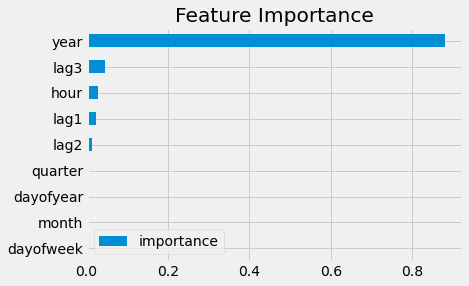

In [364]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

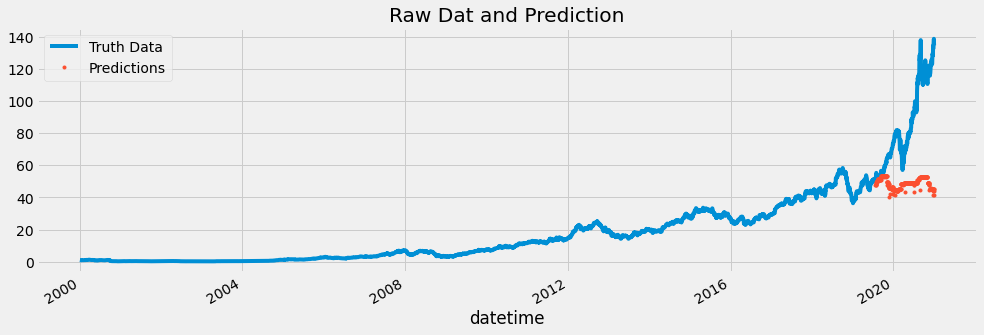

In [365]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['High']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

In [366]:
score = np.sqrt(mean_squared_error(test['High'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 44.60


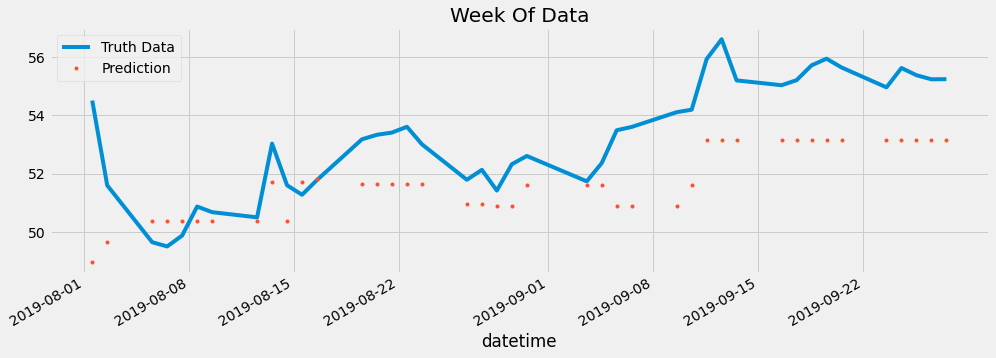

In [367]:
ax = df.loc[(df.index > '2019-08-01') & (df.index < '2019-09-30')]['High'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '2019-08-01') & (df.index < '2019-09-30')]['prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

In [368]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

date
2020-12-30    94.438297
2020-12-29    93.387711
2020-12-28    93.180641
2020-12-23    90.878284
2020-12-31    89.690510
2020-12-22    89.007721
2020-12-24    88.480698
2020-08-31    86.567944
2020-09-02    85.461315
2020-12-17    84.600693
Name: error, dtype: float64

In [369]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=True).head(10)

date
2019-08-16    0.032845
2019-08-12    0.134201
2019-09-03    0.135014
2019-08-09    0.311699
2019-08-15    0.443371
2019-08-07    0.488300
2019-08-08    0.504200
2019-08-28    0.515991
2019-08-05    0.715801
2019-09-04    0.760014
Name: error, dtype: float64

In [370]:
df.index.max()

Timestamp('2020-12-31 14:30:00')

In [371]:
future = pd.date_range('2020-12-31','2022-12-01', freq='24h')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
df['isFuture'] = False
df_and_future = pd.concat([df, future_df])
df_and_future = create_features(df_and_future)
df_and_future = add_lags(df_and_future)

In [372]:
future_w_features = df_and_future.query('isFuture').copy()

In [373]:
future_w_features['pred'] = reg.predict(future_w_features[FEATURES])

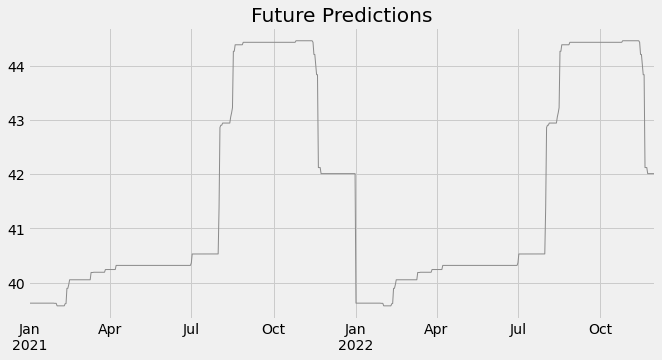

In [374]:
future_w_features['pred'].plot(figsize=(10, 5),
                               color=color_pal[4],
                               ms=1,
                               lw=1,
                               title='Future Predictions')
plt.show()